<a href="https://colab.research.google.com/github/SiracencoSerghei/DataScienceHW/blob/main/example_kaggle/les_8/simple_example_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

---
# Навчимо найпростішу нейронну мережу з одним нейроном (персептрон) розпізнавати логічну операцію AND.
---

In [2]:
# Вхідні дані (таблиця істинності AND)
X = np.array([[0, 0],  # 0 AND 0 = 0
              [0, 1],  # 0 AND 1 = 0
              [1, 0],  # 1 AND 0 = 0
              [1, 1]]) # 1 AND 1 = 1

# Відповідні мітки класів (очікуваний результат для AND)
y = np.array([[0], [0], [0], [1]])

In [3]:
# Ініціалізація ваг та зміщення (bias)
np.random.seed(1)
weights = np.random.rand(2, 1)  # Два входи, один вихід
bias = np.random.rand(1)  # Один зміщувальний коефіцієнт

# Функція активації (сигмоида)
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Похідна сигмоїди для оновлення ваг
def sigmoid_derivative(x):
    return x * (1 - x)

In [8]:
# Параметри навчання
epochs = 5001  # Кількість ітерацій навчання
learning_rate = 0.1  # Швидкість навчання
errors = []  # Список для збереження середньої помилки

# Навчання нейронної мережі
for epoch in range(epochs):
    # Прямий прохід
    linear_output = np.dot(X, weights) + bias  # Зважена сума входів + зміщення
    predicted_output = sigmoid(linear_output)  # Прогноз після функції активації

    # Обчислення помилки
    error = y - predicted_output  # Різниця між очікуваним і реальним виходом
    errors.append(np.mean(np.abs(error)))  # Збереження середньої абсолютної помилки

    # Зворотний прохід (градієнтний спуск)
    d_predicted_output = error * sigmoid_derivative(predicted_output)  # Похідна помилки
    weights += X.T.dot(d_predicted_output) * learning_rate  # Оновлення ваг
    bias += np.sum(d_predicted_output) * learning_rate  # Оновлення зміщення

    # Вивід прогресу кожні 1000 ітерацій
    if epoch % 1000 == 0:
        print(f"Епоха {epoch}, Середня помилка: {np.mean(np.abs(error))}")

Епоха 0, Середня помилка: 0.06516581225975984
Епоха 1000, Середня помилка: 0.058863951497172246
Епоха 2000, Середня помилка: 0.0540286765421643
Епоха 3000, Середня помилка: 0.050175235355674364
Епоха 4000, Середня помилка: 0.04701539184471423
Епоха 5000, Середня помилка: 0.04436608126094211


Вхід [0 0] → Прогноз: 0.00
Вхід [0 1] → Прогноз: 0.06
Вхід [1 0] → Прогноз: 0.06
Вхід [1 1] → Прогноз: 0.93


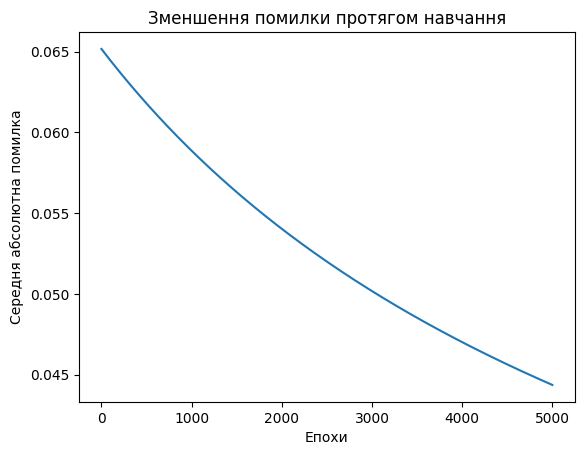

In [9]:
# Прогнозування після навчання
predictions = sigmoid(np.dot(X, weights) + bias)
for i, pred in enumerate(predictions):
    print(f"Вхід {X[i]} → Прогноз: {pred[0]:.2f}")

# Візуалізація помилки
plt.plot(errors)
plt.title("Зменшення помилки протягом навчання")
plt.xlabel("Епохи")
plt.ylabel("Середня абсолютна помилка")
plt.show()

---
# З двома прихованими нейронами у прихованому шарі (одношарова мережа).
---

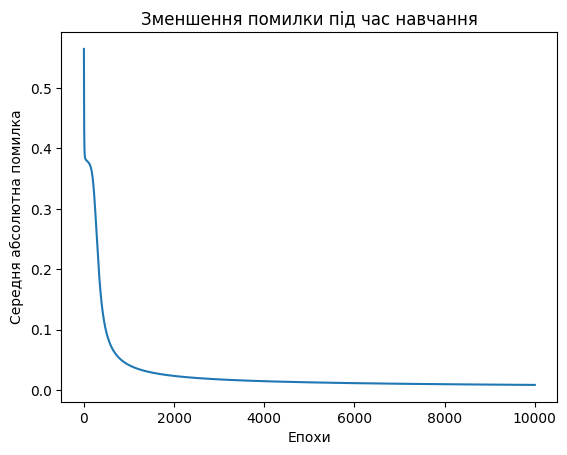


Прогнозування після навчання:
[[0.  ]
 [0.01]
 [0.01]
 [0.99]]


In [12]:
# Ініціалізація ваг випадковими значеннями
np.random.seed(1)
weights_input_hidden = np.random.uniform(size=(2, 2))  # Ваги між вхідним і прихованим шаром
weights_hidden_output = np.random.uniform(size=(2, 1))  # Ваги між прихованим і вихідним шаром
bias_hidden = np.random.uniform(size=(1, 2))  # Зміщення прихованого шару
bias_output = np.random.uniform(size=(1, 1))  # Зміщення вихідного шару

# Швидкість навчання
learning_rate = 0.5

# Кількість епох (ітерацій навчання)
epochs = 10000
error_list = []  # Масив для збереження помилок

for epoch in range(epochs):
    # ---- ПРЯМЕ ПОШИРЕННЯ ----
    # 1. Обчислюємо значення прихованого шару
    hidden_input = np.dot(X, weights_input_hidden) + bias_hidden
    hidden_output = sigmoid(hidden_input)

    # 2. Обчислюємо значення вихідного шару
    final_input = np.dot(hidden_output, weights_hidden_output) + bias_output
    final_output = sigmoid(final_input)

    # ---- ОБЧИСЛЕННЯ ПОМИЛКИ ----
    error = y - final_output
    error_list.append(np.mean(np.abs(error)))  # Записуємо середню помилку

    # ---- ЗВОРОТНЕ ПОШИРЕННЯ ----
    # 1. Градієнт для вихідного шару
    d_output = error * sigmoid_derivative(final_output)

    # 2. Градієнт для прихованого шару
    d_hidden = d_output.dot(weights_hidden_output.T) * sigmoid_derivative(hidden_output)

    # ---- ОНОВЛЕННЯ ВАГ ----
    weights_hidden_output += hidden_output.T.dot(d_output) * learning_rate
    weights_input_hidden += X.T.dot(d_hidden) * learning_rate
    bias_output += np.sum(d_output, axis=0, keepdims=True) * learning_rate
    bias_hidden += np.sum(d_hidden, axis=0, keepdims=True) * learning_rate

# ---- ВІЗУАЛІЗАЦІЯ ПОМИЛКИ ----
plt.plot(error_list)
plt.xlabel("Епохи")
plt.ylabel("Середня абсолютна помилка")
plt.title("Зменшення помилки під час навчання")
plt.show()

# ---- ПЕРЕВІРКА РЕЗУЛЬТАТУ ----
print("\nПрогнозування після навчання:")
print(np.round(final_output, 2))

🔥 **Що робить цей код?**

- Створює нейромережу із 2 вхідними, 2 прихованими та 1 вихідним нейроном.

- Навчає її на логічній операції AND (вихід дорівнює 1, лише якщо обидва входи 1).

- Оновлює ваги через зворотне поширення помилки (backpropagation).

**Підсумок роботи нейромережі**

✅ Вхідний шар отримує вхідні дані.

✅ Прихований шар застосовує ваги та sigmoid(), щоб навчитися розпізнавати патерни.

✅ Вихідний шар прогнозує остаточне значення (0 або 1).

✅ Навчання триває тисячі епох, поки помилка не стане малою.

✅ Графік помилки показує, як вона зменшується в процесі навчання:

📉 Чим менше помилка — тим точніше прогнозування!